# Optical character recognition
This project demonstrates how to predict character from a 5x5 matrix, represented as as vector of n=25 using an only mathematical approach. Only the charracters J, D and N will be used for recognition. Inner products, correlation matrices and dot products are at the center of this project.
By Jaden van Rijswijk.

In [83]:
import numpy as np
import random
import math
import pandas as pd
import seaborn as sns

In [ ]:
def visualise_character(character) -> None:
    for i in range(5):
        for j in range(5):
            if character[i*5 + j] > 0.5:
                print("█", end="")
            else:
                print(" ", end="")
        print()
        
def visualise_probability_matrix(character) -> None:
    for i in range(5):
        for j in range(5):
            print(f"{character[i*5 + j]:.2f} ", end="")
        print()
        
def make_blurred(character, blur_level=0.2, min_value=0) -> list[int]:
    blurred_character = []
    for value in character:
        if value > 0.5:
            blurred_character.append(random.uniform(max(min_value, value - blur_level), 1))
        else:
            blurred_character.append(value)
            
    assert len(blurred_character) == 25
    return blurred_character

def make_noisy(character, noise_level=0.2, max_value=1) -> list[int]:
    noisy_character = []
    for value in character:
        if value < 0.5:
            noisy_character.append(random.uniform(0, min(value + noise_level, max_value)))
        else:
            noisy_character.append(value)
            
    assert len(noisy_character) == 25
    return noisy_character

In [ ]:
noise_level = 0.3
blur_level = 0.3
chars = ['j', 'd', 'n']

j_perfect = [1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1,1,1,1]
d_perfect = [1,1,1,1,0,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,1,1,1,0]
n_perfect = [1,0,0,0,1,1,1,0,0,1,1,0,1,0,1,1,0,0,1,1,1,0,0,0,1]

assert len(j_perfect) == 25
assert len(d_perfect) == 25
assert len(n_perfect) == 25

char_vectors = {}


for c in chars:
    char_vectors.update({
        f"{c}_perfect": eval(f"{c}_perfect"),
        f"{c}_noisy": make_noisy(eval(f"{c}_perfect"), noise_level),
        f"{c}_blurred": make_blurred(eval(f"{c}_perfect"), blur_level),
        f"{c}_noisy_blurred": make_noisy(make_blurred(eval(f"{c}_perfect"), blur_level), noise_level)
    })

<Axes: >

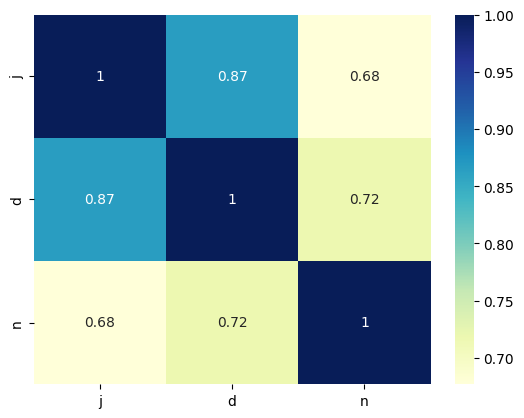

In [ ]:
def magnitude(c):
    sum_squares = sum([x**2 for x in c])
    return math.sqrt(sum_squares)

def inner_product(x, y):
    return sum([x_i* y_i for x_i, y_i in zip(x, y)])

def cosine_similarity(x, y):
    return inner_product(x, y) / (magnitude(x) * magnitude(y))

def make_correlation_matrix():
    correlations = pd.DataFrame(columns=
    for char, variants in all_characters.items():
        for variant in variants:
            for target_char, target_variants in all_characters.items():
                for target_variant in target_variants:
                    correlations.loc[char, target_char] = cosine_similarity(variant, target_variant)
    return correlations

correlation_matrix = make_correlation_matrix()
sns.heatmap(correlation_matrix.astype(float), annot=True, cmap="YlGnBu")